In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import keras
import textgenrnn

Using TensorFlow backend.


In [2]:
df = pd.read_csv('amazon_history.csv')

In [3]:
df.columns

Index(['Order Date', 'Order ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC Code', 'Website', 'Release Date', 'Condition', 'Seller',
       'Seller Credentials', 'List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity', 'Payment Instrument Type', 'Purchase Order Number',
       'PO Line Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied', 'Tax Exemption Type',
       'Exemption Opt-Out', 'Buyer Name', 'Currency', 'Group Name'],
      dtype='object')

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Item Total'] = df['Item Total'].replace({'\$':''}, regex=True)
df['Item Total'] = pd.to_numeric(df['Item Total'])

In [5]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.strftime('%B')
df['Order Month Digit'] = df['Order Date'].dt.month

In [6]:
df.groupby('Order Year').sum()['Item Total']

Order Year
2015     480.93
2016     414.58
2017     701.46
2018    2255.26
2019    3868.44
2020    6115.47
2021    1749.93
Name: Item Total, dtype: float64

Text(0.5, 1.0, 'Amazon Purchase Total By Year')

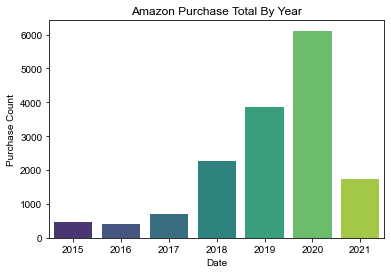

In [7]:
df_orders_year = pd.DataFrame(df.groupby('Order Year').sum()['Item Total']).reset_index()
sns.barplot(data = df_orders_year, x = 'Order Year', y = 'Item Total', palette='viridis')
sns.set_style('darkgrid')
plt.ylabel('Purchase Count')
plt.xlabel('Date')
plt.title('Amazon Purchase Total By Year')

In [74]:
max_val = df_orders_year['Item Total'].max()
max_year = list(df_orders_year[df_orders_year['Item Total'] == max_val]['Order Year'])[0]

In [75]:
max_year

2020

In [40]:

# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[72.89152541]


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [43]:
df_mon

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name,Order Year,Order Month,Order Month Digit
0,2015-02-08,105-1540870-8791414,[2Pack] iPhone Charger Cable Charge Cable 3Fee...,ELECTRONIC_CABLE,B00J46VVKE,43191600.0,Amazon.com,NaN,new,iXCC,...,9.99,NaN,NaN,NaN,Tyler Richards,USD,NaN,2015,February,2
1,2015-03-09,002-7025377-8997837,"Velette Tie Clips for Men, Classic Tie Pins Se...",FASHIONOTHER,B00KB3R748,54100000.0,Amazon.com,NaN,new,Quality Stays,...,15.95,NaN,NaN,NaN,Tyler Richards,USD,NaN,2015,March,3
2,2015-03-09,002-7025377-8997837,Build-on Brick Shot Glass 4-pack,DRINKING_CUP,B00K8CVPU4,56101500.0,Amazon.com,NaN,new,Blue Forest Market,...,7.85,NaN,NaN,NaN,Tyler Richards,USD,NaN,2015,March,3
3,2015-04-06,002-3403333-5353051,"Barron's AP Biology, 5th Edition",ABIS_BOOK,1438005008,55101500.0,Amazon.com,2015-01-01T00:00:01,new,Amazon.com,...,15.77,NaN,NaN,NaN,Tyler Richards,USD,NaN,2015,April,4
4,2015-06-14,002-6555782-3208237,Retro World Map Womens Quartz Wrist Watch Brown,WATCH,B00HIYT4CG,54111501.0,Amazon.com,NaN,new,hacbiwa,...,3.83,NaN,NaN,NaN,Tyler Richards,USD,NaN,2015,June,6


In [8]:
import statsmodels.api as sm

In [9]:
df_model = df_orders_year[df_orders_year['Order Year'] != 2021]
x = df_model['Order Year']
y = df_model['Item Total']

In [10]:
df_model.append()

TypeError: append() missing 1 required positional argument: 'other'

In [19]:
results.predict(2050)

array([2344.85201081])

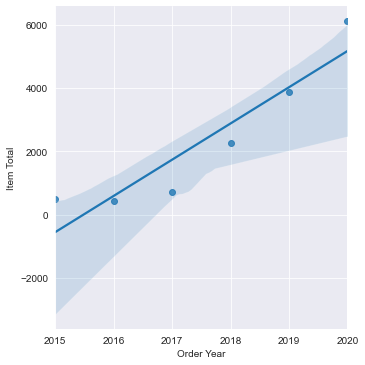

In [23]:
sns.lmplot(data = df_model, x = 'Order Year', y = 'Item Total')

In [22]:
y

0     480.93
1     414.58
2     701.46
3    2255.26
4    3868.44
5    6115.47
Name: Item Total, dtype: float64

In [1]:
X = sm.add_constant(df)
model = sm.OLS(AAPL_price['Close'],X)
results = model.fit()
plt.scatter(SPY_price['Close'],AAPL_price['Close'],alpha=0.3)
y_predict = results.params[0] + results.params[1]*SPY_price['Close']
plt.plot(SPY_price['Close'],y_predict, linewidth=3)

ModuleNotFoundError: No module named 'statsmodels'

In [76]:
df.to_csv('test.csv', index=False)

In [77]:
from textgenrnn import textgenrnn
textgen = textgenrnn()
textgen.train_from_file('test.csv', num_epochs=1)

Using TensorFlow backend.


564 texts collected.
Training on 236,248 character sequences.
1845/1845 [==============================] - ETA: 0s - loss: 1.1978####################
Temperature: 0.2
####################
2020-01-07,113-7874788-8127972,"The Shipped,USPS(936128960009000009486),$11.99,$0.00,7.99,,,,Tyler Richards,USD,,2019,January,1

2020-01-01,111-8676896-0442446,"Good Shoester String Pack for Slim Free Stret Stretch Stand - Anti-Fram Stretch String String String - Anker for Stretch Stretch Stretcha Shipping Shipping Store Card - 100 Protectorder Stripper Stret Strip Size with Stretcha Stretcha Shoes for Stretchal Stretcha Sho

2020-01-01,113-7888489-4862186,"Hid10866, Bag - 10 Stret Stain Card - 3 Stret Stretch Shipping Stret Shoes for String String String Stand - Anker Shoesel For Stretchalical Stripper,LEANTHITS,B07NTBMSMM,53100000.0,Amazon.com,,new,Amazon.com,12601,Shipped,USPS(9361289690000000990495),$11.99,$0.00,16.

####################
Temperature: 0.5
####################
2018-03-07,111-7036369

In [72]:
textgen.generate()

ELEC_CAUL_BAG



In [11]:
df['Category'].value_counts().head(10)

ABIS_BOOK               66
PANTS                   23
SHORTS                  15
WATCH                   13
CONDOM                  12
HAIR_STYLING_AGENT      11
GROCERY                 11
HEALTH_PERSONAL_CARE    10
SOCKS                    9
STORAGE_HOOK             9
Name: Category, dtype: int64

In [ ]:
df_cities = pd.DataFrame(df['Shipping Address City'].str.upper().value_counts()).reset_index()
df_cities.columns = ['City', 'Order Count']

In [35]:
df_cat = df.groupby(['Category']).count()['Order Date'].reset_index()
df_cat.columns = ['Category', 'Purchase Count']
df_cat.sort_values(by='Purchase Count', ascending=False, inplace=True)
df_cat = df_cat.head(15)
df_cat

,Category,Purchase Count
0,ABIS_BOOK,66
117,PANTS,23
145,SHORTS,15
187,WATCH,13
45,CONDOM,12
77,GROCERY,11
81,HAIR_STYLING_AGENT,11
86,HEALTH_PERSONAL_CARE,10
162,STORAGE_HOOK,9
154,SOCKS,9


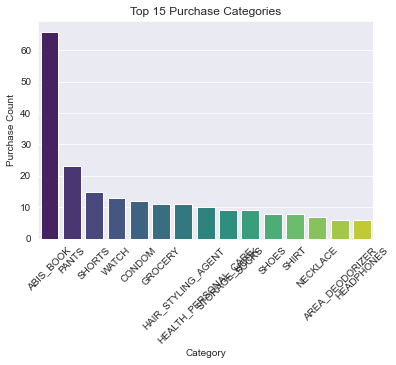

In [39]:

fig_cat = Figure()
ax_cat = fig_cat.subplots()
sns.barplot(data = df_cat, palette='viridis', 
	x = 'Category', y = 'Purchase Count', ax=ax_cat)
ax_cat.set_xticklabels(df_cat['Category'], rotation=45)
ax_cat.set_title('Top 15 Purchase Categories')
ax_cat.set_ylabel('Purchase Count')
fig_cat

In [21]:
from matplotlib.figure import Figure

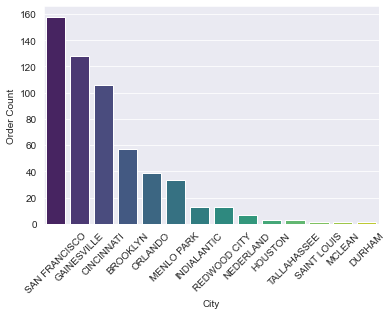

In [24]:
fig_cities = Figure()
ax_cities = fig_cities.subplots()
sns.barplot(data = df_cities, palette='viridis', x='City', y='Order Count', ax=ax_cities)
ax_cities.set_xticklabels(df_cities['City'], rotation=45)


In [ ]:
#other ideas
#number of orders over time

In [44]:
df_copy = df.copy()
df_copy.set_index('Order Date', inplace=True)

In [45]:
df_month_date = pd.DataFrame(df_copy.resample('1M').count()['Order ID']).reset_index()
df_month_date.columns = ['date', 'count']

In [46]:
df_month_date

,date,count
0,2015-02-28,1
1,2015-03-31,2
2,2015-04-30,1
3,2015-05-31,0
4,2015-06-30,5
...,...,...
70,2020-12-31,27
71,2021-01-31,35
72,2021-02-28,18
73,2021-03-31,9


Text(0.5, 1.0, 'Amazon Purchases Over Time')

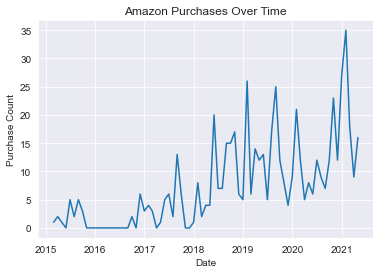

In [28]:
sns.lineplot(data = df_month_date, x = 'date', y = 'count', palette='viridis')
sns.set_style('darkgrid')
plt.ylabel('Purchase Count')
plt.xlabel('Date')
plt.title('Amazon Purchases Over Time')

In [ ]:
#prediction

In [54]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = list(df_month_date['count'])
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat[0])

11.436731334384607


In [11]:
df['month_period'] = df['Order Date'].dt.to_period('M')

In [23]:
df_month_period = pd.DataFrame(df.groupby('month_period')['Order Date'].count()).reset_index()
df_month_period.columns = ['month_period', 'count']

In [21]:
df_month_period['month_period'][0]

Period('2015-02', 'M')

TypeError: Axis must have `freq` set to convert to Periods

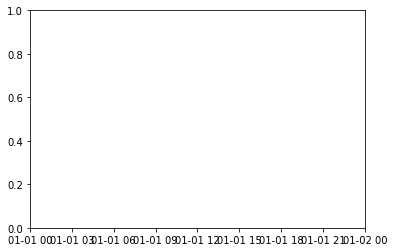

In [19]:
sns.lineplot(data=df_month_period, x = 'month_period', y = 'count')

TypeError: float() argument must be a string or a number, not 'Period'

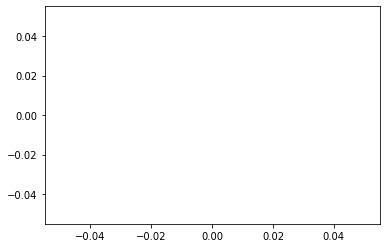

In [12]:
sns.plotting_context(data=df, x = 'month_period')

In [33]:
df['Order Year'].value_counts()

2020    154
2019    151
2018    110
2021     78
2017     41
2015     19
2016     11
Name: Order Year, dtype: int64

In [35]:
df_month = df.groupby(['Order Month', 'Order Month Digit']).count()['Order Date'].reset_index()
df_month.columns = ['Month', 'Month_digit', 'Order_count']
df_month

,Month,Month_digit,Order_count
0,April,4,42
1,August,8,65
2,December,12,45
3,February,2,42
4,January,1,94
5,July,7,37
6,June,6,35
7,March,3,34
8,May,5,44
9,November,11,28


In [38]:
df_month.sort_values(by = 'Month_digit', inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

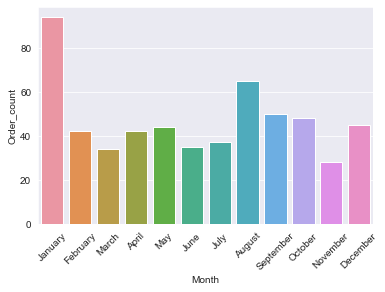

In [40]:
sns.barplot(data = df_month, x = 'Month', y = 'Order_count')
plt.xticks(rotation=45)

In [34]:
df['Order Month'].value_counts()

January      94
August       65
September    50
October      48
December     45
May          44
February     42
April        42
July         37
June         35
March        34
November     28
Name: Order Month, dtype: int64

In [15]:
pd.DataFrame(df['Title'].value_counts().head(10)).reset_index()

,index,Title
0,Trojan Condom Sensitivity Ultra Thin Spermicid...,9
1,"Amazon Brand - Goodthreads Men's Slim-Fit 9"" I...",7
2,U.S. Polo Assn. Men's Corduroy Pant,5
3,"Amazon Brand - Goodthreads Men's 7"" Inseam Com...",4
4,"Layrite Natural Matte Cream, Basic, White, Mil...",3
5,"Van Heusen Men's Traveler Slim Fit Pant, Taupe...",2
6,Burt’s Bees 100% Natural Overnight Intensive L...,2
7,Penn Championship Tennis Balls - Extra Duty Fe...,2
8,DWCN Light Grey Blackout Curtains - Room Darke...,2
9,"Nespresso Capsules OriginalLine, Ispirazione V...",2


In [16]:
df.columns

Index(['Order Date', 'Order ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC Code', 'Website', 'Release Date', 'Condition', 'Seller',
       'Seller Credentials', 'List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity', 'Payment Instrument Type', 'Purchase Order Number',
       'PO Line Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied', 'Tax Exemption Type',
       'Exemption Opt-Out', 'Buyer Name', 'Currency', 'Group Name',
       'Order Year', 'Order Month', 'Order Month Digit'],
      dtype='object')